## NEW AND BETTER EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_receivals = pd.read_csv(r'.\data\kernel\receivals.csv')

## REMOVE ALL ROWS WITH NA FOR RM_ID

In [4]:
#remove all rows with NA for rm_id
df_receivals = df_receivals.dropna(subset=['rm_id'])

## REMOVE ALL ROWS WITH NA FOR NET_WEIGHT

In [5]:
# remove all rows with NA for net_weight
df_receivals = df_receivals.dropna(subset=['net_weight'])

## CREATE DAY_OF_YEAR, YEAR AND MONTH FROM date_arrival

In [6]:
# Ensure everything is a string first
df_receivals['date_arrival'] = df_receivals['date_arrival'].astype(str).str.strip()

# Convert to datetime, coerce invalid formats
df_receivals['date_arrival'] = pd.to_datetime(
    df_receivals['date_arrival'], 
    errors='coerce', 
    utc=True  # handle timezone info
)

# Remove timezone and keep only date
df_receivals['date_arrival'] = df_receivals['date_arrival'].dt.tz_localize(None).dt.date

# Convert to string in YYYY-MM-DD format
df_receivals['date_arrival'] = df_receivals['date_arrival'].astype(str)

# Convert date_arrival to datetime but keep original values where possible
df_receivals['date_arrival'] = pd.to_datetime(
    df_receivals['date_arrival'], 
    errors='coerce'
)

# Create new columns while keeping date_arrival intact
df_receivals['day_of_year'] = df_receivals['date_arrival'].dt.dayofyear
df_receivals['month'] = df_receivals['date_arrival'].dt.month
df_receivals['year'] = df_receivals['date_arrival'].dt.year

# Verify
print(df_receivals[['date_arrival', 'day_of_year', 'month', 'year']].head())

  date_arrival  day_of_year  month  year
0   2004-06-15          167      6  2004
1   2004-06-15          167      6  2004
2   2004-06-15          167      6  2004
3   2004-06-15          167      6  2004
4   2004-06-15          167      6  2004


## ORDER DF_RECEIVALS BY RM_ID AND YEAR AND DAY_OF_YEAR

In [7]:
# order df_receivals by rm_id and year and day_of_year
df_receivals = df_receivals.sort_values(by=['rm_id', 'year', 'day_of_year']).reset_index(drop=True)

## CREATE CUM_WEIGHT_PER_YEAR 

In [370]:
# create feature cum_weight_per_year for each of the rm_id per year until that day_of_year, counting the net_weight of that day_of_year
#df_receivals['cum_weight_per_year'] = df_receivals.groupby(['rm_id', 'year'])['net_weight'].cumsum()

## DROP NON-INTUITIONAL FEATURES FROM DF_RECEIVALS

In [371]:
# drop non-intuitional features from df_receivals
#df_receivals = df_receivals.drop(columns=['batch_id']) 

## INDEX RECEIVAL_STATUS

In [8]:
# index receival_status
df_receivals['receival_status'] = df_receivals['receival_status'].astype('category').cat.codes

## PLOT BOX-PLOTS

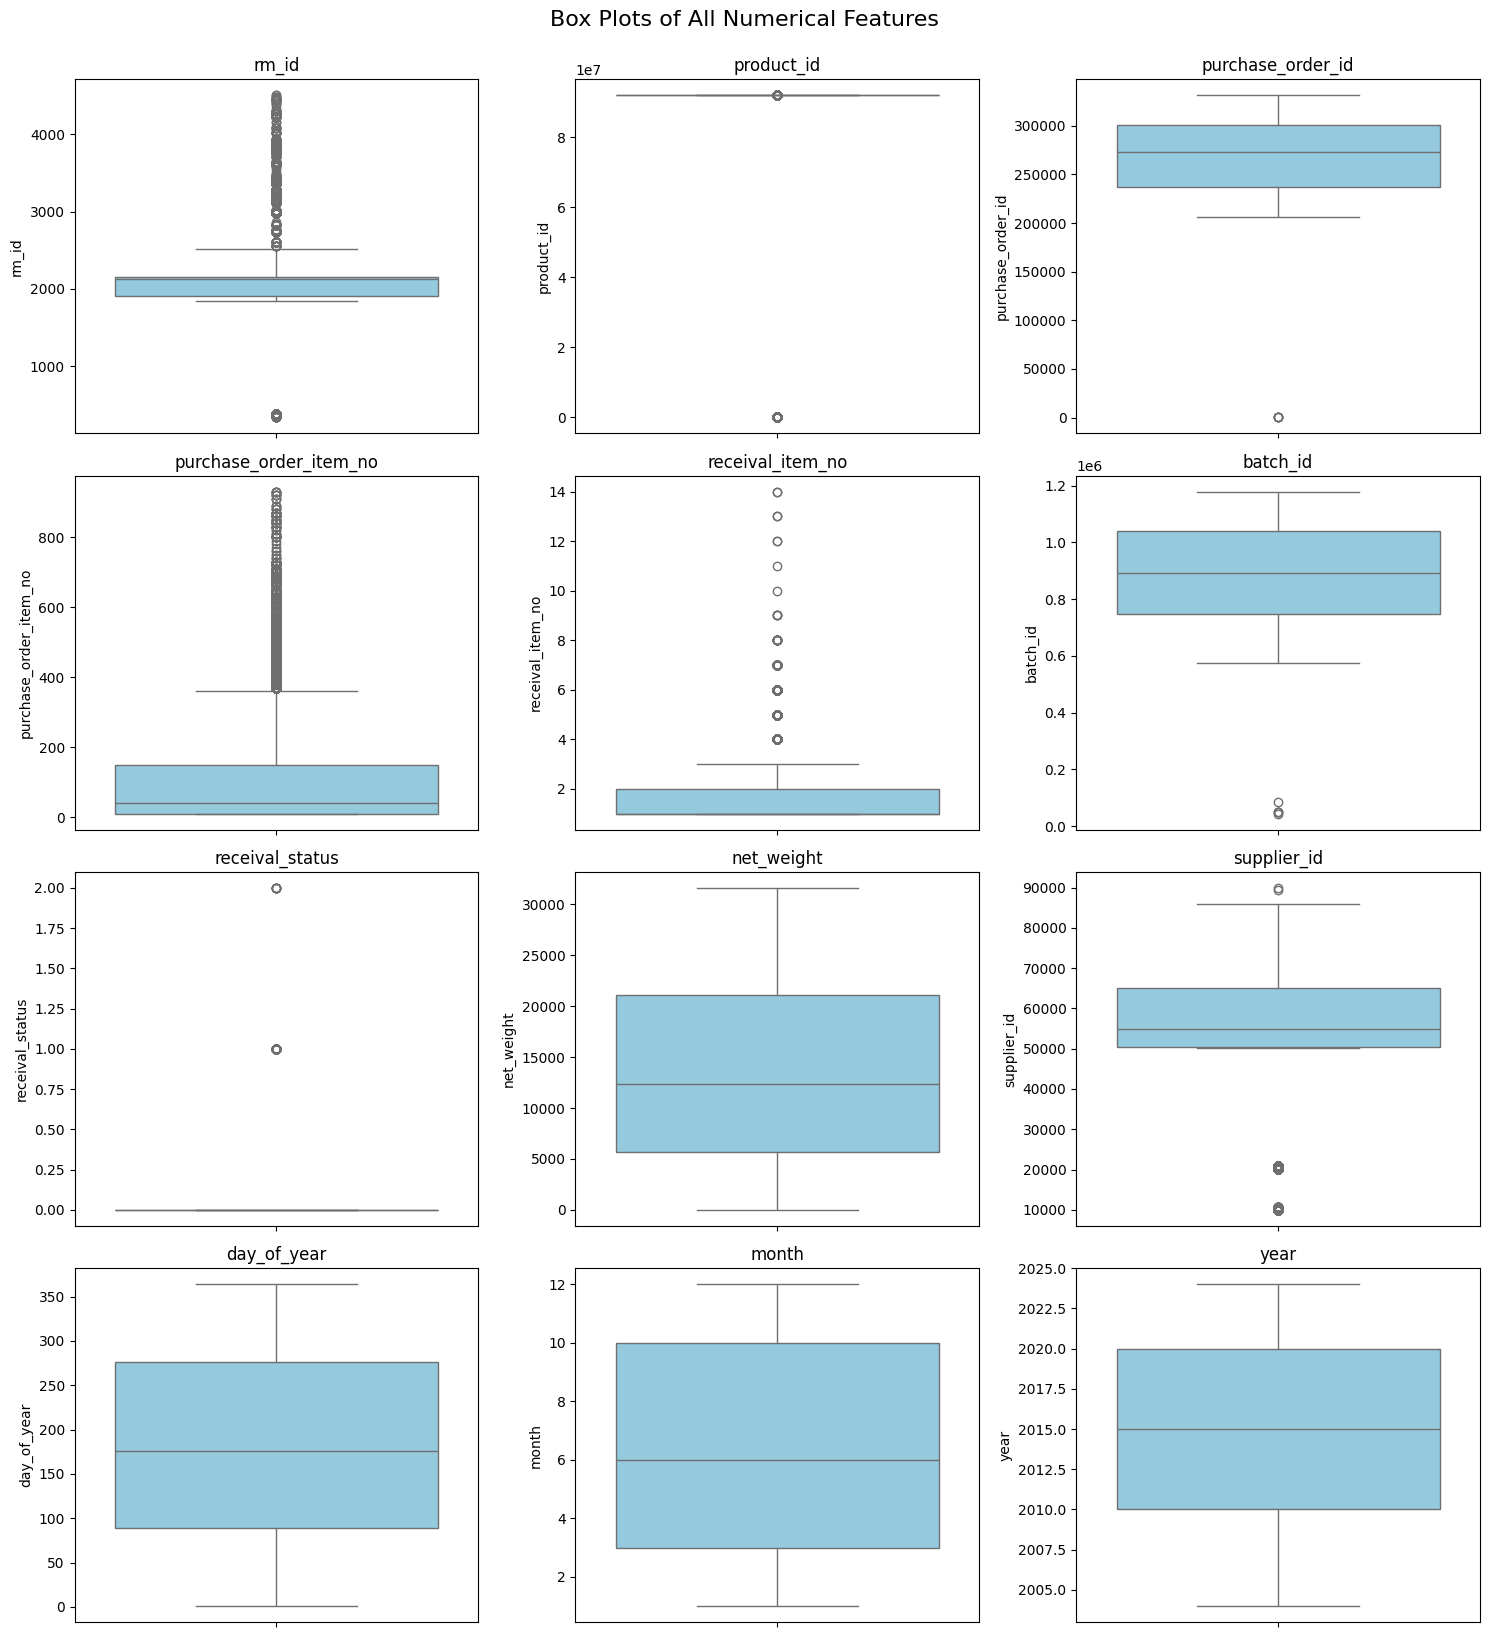

In [373]:
# Select numerical features
numeric_cols = df_receivals.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_receivals[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

## LIST OF ALL RM_IDS

In [9]:
## code that gives a list of all unique rm_ids
unique_rm_ids = df_receivals['rm_id'].unique() 

## DISTRIBUTION OF RM_ID 2197 PER YEAR

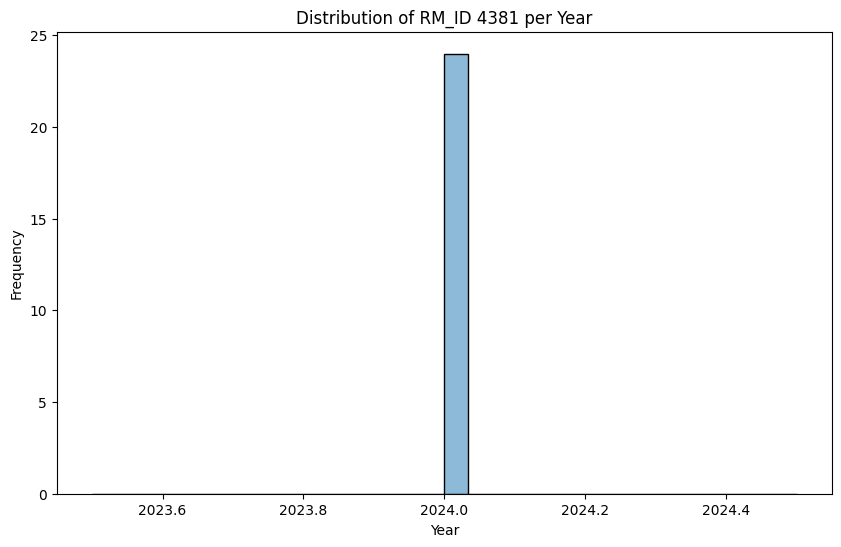

In [10]:
# distribution of rm_id 2197 per year
df_2197 = df_receivals[df_receivals['rm_id'] == 4222]
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_2197, x='year', bins=30, kde=True)
plt.title('Distribution of RM_ID 4381 per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## FIND ALL THE UNIQUE RM_IDS THAT HAVE ROWS REGISTERED IN 2024

In [11]:
# FIND ALL THE UNIQUE RM_IDS THAT HAVE ROWS REGISTERED IN 2020 OR LATER
unique_rm_ids_2024 = df_receivals[df_receivals['year'] >= 2024]['rm_id'].unique()

## REMOVE ALL ROWS THAT HAVE RM_IDS THAT AREN'T IN unique_rm_ids_2024

In [12]:
# REMOVE ALL ROWS THAT HAVE RM_IDS THAT AREN'T IN unique_rm_ids_2020
df_receivals = df_receivals[df_receivals['rm_id'].isin(unique_rm_ids_2024)].reset_index(drop=True)

## RM_ID COUNT 

In [13]:
# count of rm_id occurrences
rm_id_counts = df_receivals['rm_id'].value_counts().reset_index()
rm_id_counts.columns = ['rm_id', 'count']
print(rm_id_counts)

     rm_id  count
0   2130.0  23620
1   2140.0   5343
2   2142.0   4624
3   2132.0   3100
4   2134.0   2675
5   2135.0   2437
6   2131.0   2284
7   2144.0   2105
8   3126.0   2059
9   2145.0   1628
10  3865.0   1610
11  3781.0   1521
12  2143.0   1370
13  3125.0    846
14  2133.0    812
15  3122.0    794
16  3123.0    558
17  3124.0    519
18  3282.0    509
19  3421.0    349
20  2129.0    265
21  3121.0    260
22  3265.0    226
23  3901.0    188
24  2981.0    183
25  2125.0    144
26  2147.0    142
27  3142.0     89
28  3761.0     76
29  2124.0     69
30  2741.0     67
31  2123.0     58
32  2161.0     38
33  3362.0     36
34  3642.0     25
35  4222.0     24
36  3883.0     21
37  4443.0     20
38  3381.0     19
39  4263.0     12
40  3601.0      8
41  4302.0      8
42  4441.0      7
43  4021.0      7
44  3201.0      6
45  3701.0      6
46  3621.0      5
47  4081.0      5
48  4401.0      3
49  3581.0      2
50  4481.0      2
51  4161.0      2
52  4044.0      2
53  4501.0      2
54  3461.0

## check rows where cum_weight_year > 2.5e7

In [14]:
#high_cum_weight = df_receivals[df_receivals['cum_weight_per_year'] > 2.0e7]

## SINCE SOME OF THE RM_ID HAVE VERY SHORT COUNTS, CREATE A PROBABILITY FEATURE

In [15]:
# Total number of rows (all purchases)
total_rows = len(df_receivals)

# Probability of purchase per RM_ID
rm_id_counts['purchase_prob'] = rm_id_counts['count'] / total_rows

# Merge this probability back into df_rec_purchase
df_receivals = df_receivals.merge(
    rm_id_counts[['rm_id', 'purchase_prob']],
    on='rm_id',
    how='left'
)


## CORRELATION

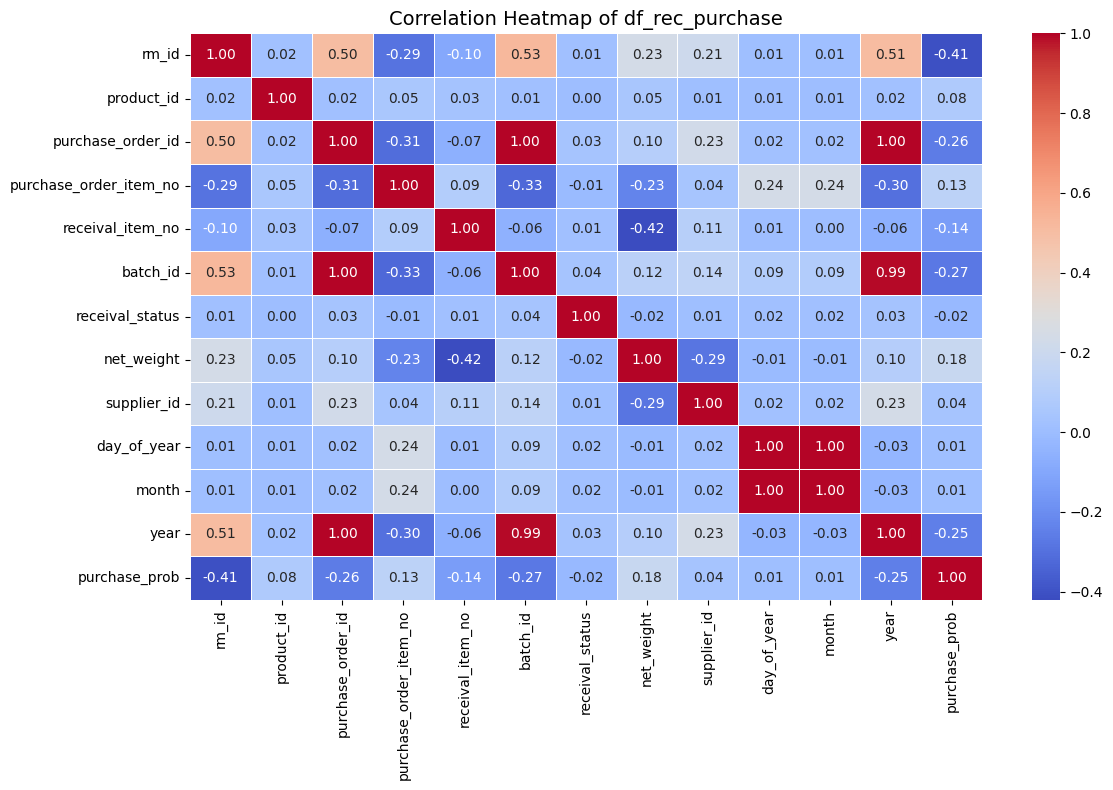

In [16]:
# Compute correlation matrix
corr = df_receivals.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of df_rec_purchase", fontsize=14)
plt.tight_layout()
plt.show()

## save to csv

In [21]:
# save to csv
df_receivals.to_csv(r'cleaned_data\processed_receivals.csv', index=False)    